In [1]:
#target attribute = fire = "yes"/ "no"
#select 2 classification algorithms and apply to training set to train predictive model
#explore impact of different hyperparameters on accuracy
#1. Linear SVM,2 Gaussian Process

In [2]:

#present results for each model with hyperparameter setting in skicit learnin

First we will set up the data and put it in a useable format for our chosen classification algorithm

In [3]:
import pandas as pd

#import data 
training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"
independent_cols = ["year", "temp", "humidity", "rainfall", "drought_code",
                    "buildup_index", "day", "month", "wind_speed"]
#dependent column is the value we are interested to find out
dependent_col = "fire"

#load in data using pandas library
df_training = pd.read_csv(training_file)
#print some general information about the data 
#head = first 4 rows 
print(df_training.head())
#shape = dimensions - rows x columns (including indentifier (0,1,2,..)
print(df_training.shape)


  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)


In [4]:
#set up matrix containing independent variables from training data

#can use loc to access a group of rows and columns by name
#":" means all
#This line is getting all the rows assosiated with the independent variables
X_training = df_training.loc[:, independent_cols]
print(X_training.head())
print(X_training.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    28        59       0.0          8.06           3.47    1      6   
1  2010    30        61       1.3          8.17           4.03    2      6   
2  2009    26        83      13.1          8.08           3.59    3      6   
3  2017    25        87       2.5          7.18           2.42    4      6   
4  2014    28        77       0.0         14.98           4.63    5      6   

   wind_speed  
0          19  
1          13  
2          22  
3          15  
4          18  
(154, 9)


In [5]:
#set up vector y containing depending variable (one we are trying to find)
Y_training = df_training.loc[:,dependent_col]
print(Y_training.head())
print(Y_training.shape)

0    no
1    no
2    no
3    no
4    no
Name: fire, dtype: object
(154,)


In [6]:
#load test data 
df_test = pd.read_csv(test_file)
print(df_test.head())
print(df_test.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31        72       0.3         30.47           5.63    7   

   month  wind_speed  
0      6          16  
1      6          18  
2      9          19  
3      9          28  
4      9          17  
(50, 10)


In [7]:
#set up matrix X for independent variables from test data 
X_test = df_test.loc[:,independent_cols]
print(X_test.head())
print(X_test.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    33        68       4.5          9.12           5.09   19      6   
1  2009    28        56       0.0         38.17          21.21   12      6   
2  2017    30        64       0.6         15.38           6.24   24      9   
3  2007    23        74       8.3          7.36           2.27   14      9   
4  2017    31        72       0.3         30.47           5.63    7      9   

   wind_speed  
0          16  
1          18  
2          19  
3          28  
4          17  
(50, 9)


In [8]:
#set up vector y containing dependent variable for test data
Y_test = df_test.loc[:,dependent_col]
print(Y_test.head())
print(Y_test.shape)

0     no
1    yes
2     no
3     no
4     no
Name: fire, dtype: object
(50,)


Now we will use two different classification algorithms from the scikit-learn package and apply them to the training data to train our model.

The algorithms I am going to user are:
1. Linear SVM - an algorithm that can be used for data which can be classified into two categories (which is the case in the case of the "fire" variable)
2. Gaussian Process - an algorithm which predicts class with uncertainty

First I will use the  default settings

In [9]:
from sklearn.svm import SVC
from sklearn import metrics

#create model using the default settings for Linear SVM - kernal = linear, C (regularisation parameter = 1.0)
model = SVC(kernel = "linear")
model.fit(X_training, Y_training, sample_weight = None)

#compute the predictions for the training and test set
predictions_training = model.predict(X_training)
predictions_test = model.predict(X_test)

#compute the accuracy on the training and test predictions
accuracy_training = metrics.accuracy_score(Y_training,predictions_training)
accuracy_test = metrics.accuracy_score(Y_test,predictions_test)
print("Accuracy on training data: ",accuracy_training)
print("Accuracy on test data: ",accuracy_test)

Accuracy on training data:  0.9155844155844156
Accuracy on test data:  0.88


In [55]:
# Now let's evaluate the effect of using different C values (the default is 1.0)
# C (float, positive value) is the regularisation paramter. 
#This value is used for calibration (helping to prevent over and under-fitting)
import numpy as np
c_values = np.linspace(1.0,30.0,num=5)
print("c values: \n", c_values)

accuracy_training_c = []
accuracy_test_c = []
for c in c_values:
    model_c = SVC(C = c, kernel = "linear")
    model_c.fit(X_training, Y_training)
    
    #compute predictions for training and test sets
    predictions_training_c = model_c.predict(X_training)
    predictions_test_c = model_c.predict(X_test)
    
    #compute accuracy for training and test predictions
    accuracy_training_c.append(metrics.accuracy_score(Y_training, predictions_training_c))
    accuracy_test_c.append(metrics.accuracy_score(Y_test, predictions_test_c))

                           
print("\naccuracy for c values in training data: \n",accuracy_training_c)
print("\naccuracy for c values in test data: \n",accuracy_test_c)

c values: 
 [ 1.    8.25 15.5  22.75 30.  ]

accuracy for c values in training data: 
 [0.9155844155844156, 0.8831168831168831, 0.8961038961038961, 0.9025974025974026, 0.935064935064935]

accuracy for c values in test data: 
 [0.88, 0.86, 0.82, 0.9, 0.82]


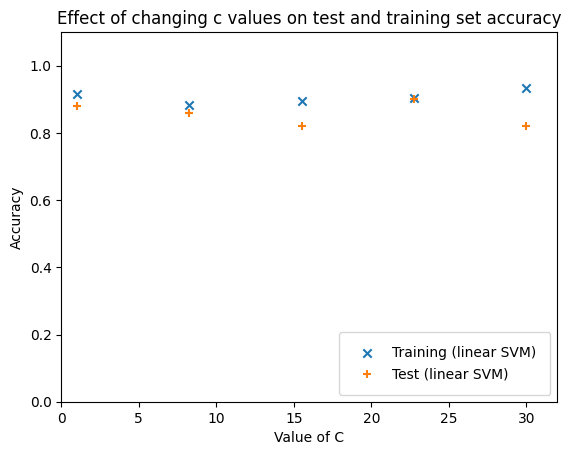

In [11]:
#plot accuracy of training versus test data
import matplotlib.pyplot as plt

plt.scatter(c_values, accuracy_training_c, marker="x")
plt.scatter(c_values, accuracy_test_c, marker = "+")
plt.xlim([0,max(c_values)+2])
plt.ylim([0,1.1])
plt.xlabel("Value of C")
plt.ylabel("Accuracy")
legends_labels = ["Training (linear SVM)", "Test (linear SVM)"]
plt.legend(labels=legends_labels, loc=4, borderpad=1)
plt.title("Effect of changing c values on test and training set accuracy")
plt.show()

In [12]:
#explore the impact of changing another parameter
#Changing the tolerance parameter - tolerance for the stopping criteria
#default tolerence = 0.000001
tol_values=np.linspace(0.000001,5,5)
print("Tolerance values: \n", tol_values)

accuracy_training_c_tol = []
accuracy_test_c_tol = []
for j in range(len(tol_values)):
    accuracy_training_c_tol.append([])
    accuracy_test_c_tol.append([])
    
    #change c values too
    for c in c_values: 
        model_c_tol = SVC(C=c, kernel = "linear", tol=tol_values[j])
        model_c_tol.fit(X_training, Y_training)

        #compute predictions for training and test sets
        predictions_training_c_tol = model_c_tol.predict(X_training)
        predictions_test_c_tol = model_c_tol.predict(X_test)

        #compute accuracy for training and test predictions
        accuracy_training_c_tol[j].append(metrics.accuracy_score(Y_training, predictions_training_c_tol))
        accuracy_test_c_tol[j].append(metrics.accuracy_score(Y_test, predictions_test_c_tol))
                
    print("\ntol= ",tol_values[j], " Training accuracy: ", accuracy_training_c_tol[j])
    print("\ntol= ",tol_values[j], " Test accuracy: ",accuracy_test_c_tol[j])

Tolerance values: 
 [1.00000000e-06 1.25000075e+00 2.50000050e+00 3.75000025e+00
 5.00000000e+00]

tol=  1e-06  Training accuracy:  [0.9155844155844156, 0.8831168831168831, 0.8961038961038961, 0.9025974025974026, 0.935064935064935]

tol=  1e-06  Test accuracy:  [0.88, 0.86, 0.82, 0.82, 0.82]

tol=  1.2500007499999999  Training accuracy:  [0.9025974025974026, 0.8961038961038961, 0.8961038961038961, 0.9155844155844156, 0.8961038961038961]

tol=  1.2500007499999999  Test accuracy:  [0.86, 0.86, 0.84, 0.82, 0.84]

tol=  2.5000005  Training accuracy:  [0.512987012987013, 0.512987012987013, 0.512987012987013, 0.512987012987013, 0.512987012987013]

tol=  2.5000005  Test accuracy:  [0.56, 0.56, 0.56, 0.56, 0.56]

tol=  3.7500002500000003  Training accuracy:  [0.512987012987013, 0.512987012987013, 0.512987012987013, 0.512987012987013, 0.512987012987013]

tol=  3.7500002500000003  Test accuracy:  [0.56, 0.56, 0.56, 0.56, 0.56]

tol=  5.0  Training accuracy:  [0.512987012987013, 0.512987012987013

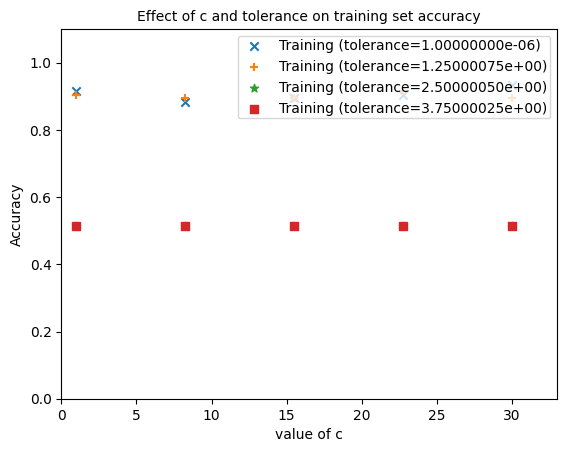

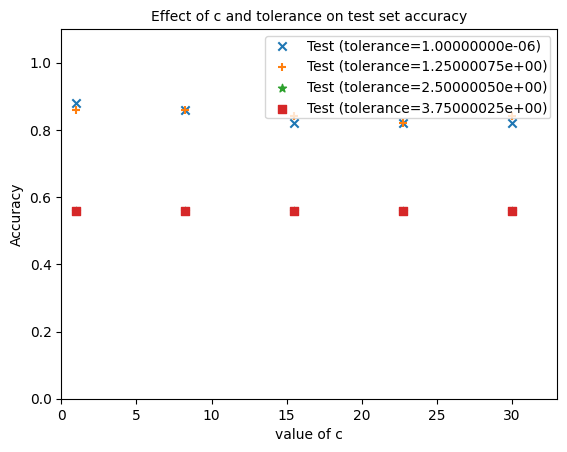

In [13]:
#plot accuracy on training set

import matplotlib.pyplot as plt

plt.scatter(c_values, accuracy_training_c_tol[0], marker="x")
plt.scatter(c_values, accuracy_training_c_tol[1], marker="+")
plt.scatter(c_values, accuracy_training_c_tol[2], marker="*")
plt.scatter(c_values, accuracy_training_c_tol[3], marker="s")

plt.xlim([0,max(c_values)+3])
plt.ylim([0.0,1.1])
plt.xlabel("value of c")
plt.ylabel("Accuracy")
legend_labels = ["Training (tolerance=1.00000000e-06)","Training (tolerance=1.25000075e+00)","Training (tolerance=2.50000050e+00)","Training (tolerance=3.75000025e+00)","Training (tolerance=01 5.00000000e+00)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of c and tolerance on training set accuracy", fontsize=10)
plt.show()

#plot test accuracy
plt.scatter(c_values, accuracy_test_c_tol[0], marker="x")
plt.scatter(c_values, accuracy_test_c_tol[1], marker="+")
plt.scatter(c_values, accuracy_test_c_tol[2], marker="*")
plt.scatter(c_values, accuracy_test_c_tol[3], marker="s")

plt.xlim([0,max(c_values)+3])
plt.ylim([0.0,1.1])
plt.xlabel("value of c")
plt.ylabel("Accuracy")
legend_labels = ["Test (tolerance=1.00000000e-06)","Test (tolerance=1.25000075e+00)","Test (tolerance=2.50000050e+00)","Test (tolerance=3.75000025e+00)","Test (tolerance=01 5.00000000e+00)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of c and tolerance on test set accuracy", fontsize=10)
plt.show()


In [14]:
# find best test set accuracy using numpy

import numpy as np
np_array = np.array(accuracy_test_c_tol)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
print("Max test set accuracy:",np_array.max())
print("Index of max test set accuracy:",max_index)
print("Hyperparameter values: c =",c_values[max_index[0]],"tolerance =",tol_values[max_index[1]]) 

Max test set accuracy: 0.88
Index of max test set accuracy: (0, 0)
Hyperparameter values: c = 1.0 tolerance = 1e-06


Key take away points from the linear SVM worked example:

    => Accuracy on the training and test data with no hyperparameter changed (except the kernal type to make it linear) is 0.92 and 0.88 respectively
    => There is no clear relationship between changing c values and the test and training set accuracy. Although training and test accuracy change with changing values of          c, there does not seem to be a pattern in this change. for example, initially with a lower c value, accuracy in test and training data is high. Accuracy reduces as c        increases and then begins to increase again as c increases.
    => Accuracy of both test and training data seem to reduce as values of tolerance increase
    => In general, training set accuracy is higher than test set accuracy (as expected because these are the values we use to train the model)
    => The best test set accuracy when both hyperparameters were changed was 0.88
    => This accuracy value occured when c = 1.0 and tolerance = 1e-06

Gaussian Process - an algorithm which predicts class with uncertainty

First I will use the default settings

In [15]:
from sklearn.gaussian_process import GaussianProcessClassifier

#create model using default settings
model2 = GaussianProcessClassifier()
model2.fit(X_training, Y_training)

#compute the predictions for the training and test set
predictions_training2 = model2.predict(X_training)
predictions_test2 = model2.predict(X_test)

#compute the accuracy on the training and test predictions
accuracy_training2 = metrics.accuracy_score(Y_training,predictions_training2)
accuracy_test2 = metrics.accuracy_score(Y_test,predictions_test2)
print("Accuracy on training data: ",accuracy_training2)
print("Accuracy on test data: ",accuracy_test2)

Accuracy on training data:  1.0
Accuracy on test data:  0.82


Effect on changing one hyperparameter

In [46]:
#changing max_iter_predict
iter_values= list(range(1,100,20))
print("max_iter_predict values:\n",iter_values)

accuracy_training_iter = []
accuracy_test_iter = []
for i in iter_values:
    model_iter = GaussianProcessClassifier(max_iter_predict=i)
    model_iter.fit(X_training, Y_training)
    
    #compute predictions for training and test sets
    predictions_training_iter = model_iter.predict(X_training)
    predictions_test_iter = model_iter.predict(X_test)
    
    #compute accuracy for training and test predictions
    accuracy_training_iter.append(metrics.accuracy_score(Y_training, predictions_training_iter))
    accuracy_test_iter.append(metrics.accuracy_score(Y_test, predictions_test_iter))

                           
print("\naccuracy for max_iter_predict values in training data: \n",accuracy_training_iter)
print("\naccuracy for max_iter_predict values in test data: \n",accuracy_test_iter)

max_iter_predict values:
 [1, 21, 41, 61, 81]

accuracy for max_iter_predict values in training data: 
 [1.0, 1.0, 1.0, 1.0, 1.0]

accuracy for max_iter_predict values in test data: 
 [0.82, 0.82, 0.82, 0.82, 0.82]


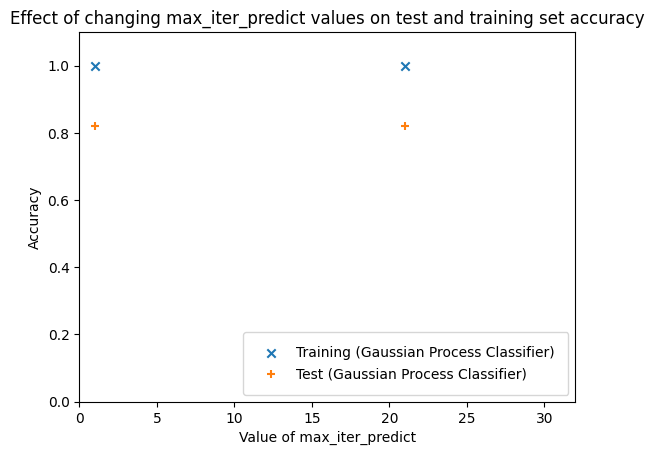

In [49]:
#plot accuracy of training versus test data
import matplotlib.pyplot as plt

plt.scatter(iter_values, accuracy_training_iter, marker="x")
plt.scatter(iter_values, accuracy_test_iter, marker = "+")
plt.xlim([0,max(c_values)+2])
plt.ylim([0,1.1])
plt.xlabel("Value of max_iter_predict")
plt.ylabel("Accuracy")
legends_labels = ["Training (Gaussian Process Classifier)", "Test (Gaussian Process Classifier)"]
plt.legend(labels=legends_labels, loc=4, borderpad=1)
plt.title("Effect of changing max_iter_predict values on test and training set accuracy")
plt.show()

In [48]:
#explore the impact of changing another parameter
#Changing the tolerance parameter - tolerance for the stopping criteria
#default tolerence = 0.000001
n_jobs_values=list(range(-5,0))
print("n_jobs values: \n", n_jobs_values)

accuracy_training_iter_njobs = []
accuracy_test_iter_njobs = []
for j in range(len(n_jobs_values)):
    accuracy_training_iter_njobs.append([])
    accuracy_test_iter_njobs.append([])
    
    #change c values too
    for i in iter_values: 
        model_iter_njobs = GaussianProcessClassifier(max_iter_predict=i,n_jobs=n_jobs_values[j])
        model_iter_njobs.fit(X_training, Y_training)
    
        #compute predictions for training and test sets
        predictions_training_iter_njobs = model_iter_njobs.predict(X_training)
        predictions_test_iter_njobs = model_iter_njobs.predict(X_test)
    
        #compute accuracy for training and test predictions
        accuracy_training_iter_njobs[j].append(metrics.accuracy_score(Y_training, predictions_training_iter_njobs))
        accuracy_test_iter_njobs[j].append(metrics.accuracy_score(Y_test, predictions_test_iter_njobs))
    
    
    print("\nn_jobs= ",n_jobs_values[j], " Training accuracy: ", accuracy_training_iter_njobs[j])
    print("\nn_jobs= ",n_jobs_values[j], " Test accuracy: ",accuracy_test_iter_njobs[j])

n_jobs values: 
 [-5, -4, -3, -2, -1]

n_jobs=  -5  Training accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0]

n_jobs=  -5  Test accuracy:  [0.82, 0.82, 0.82, 0.82, 0.82]

n_jobs=  -4  Training accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0]

n_jobs=  -4  Test accuracy:  [0.82, 0.82, 0.82, 0.82, 0.82]

n_jobs=  -3  Training accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0]

n_jobs=  -3  Test accuracy:  [0.82, 0.82, 0.82, 0.82, 0.82]

n_jobs=  -2  Training accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0]

n_jobs=  -2  Test accuracy:  [0.82, 0.82, 0.82, 0.82, 0.82]

n_jobs=  -1  Training accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0]

n_jobs=  -1  Test accuracy:  [0.82, 0.82, 0.82, 0.82, 0.82]


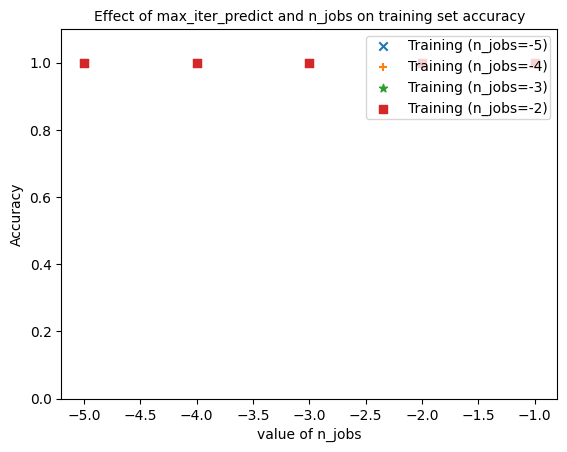

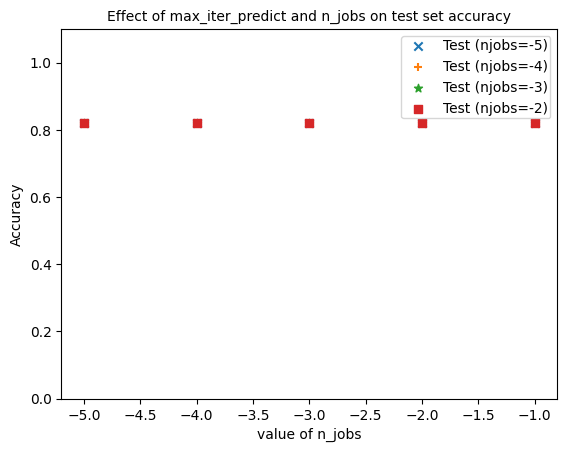

In [52]:
#plot accuracy on training set

import matplotlib.pyplot as plt

plt.scatter(n_jobs_values, accuracy_training_iter_njobs[0], marker="x")
plt.scatter(n_jobs_values, accuracy_training_iter_njobs[1], marker="+")
plt.scatter(n_jobs_values, accuracy_training_iter_njobs[2], marker="*")
plt.scatter(n_jobs_values, accuracy_training_iter_njobs[3], marker="s")

plt.ylim([0.0,1.1])
plt.xlabel("value of n_jobs")
plt.ylabel("Accuracy")
legend_labels = ["Training (n_jobs=-5)","Training (n_jobs=-4)","Training (n_jobs=-3)","Training (n_jobs=-2)","Training (n_jobs=-1)","Training (n_jobs=0)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of max_iter_predict and n_jobs on training set accuracy", fontsize=10)
plt.show()

#plot test accuracy
plt.scatter(n_jobs_values, accuracy_test_iter_njobs[0], marker="x")
plt.scatter(n_jobs_values, accuracy_test_iter_njobs[1], marker="+")
plt.scatter(n_jobs_values, accuracy_test_iter_njobs[2], marker="*")
plt.scatter(n_jobs_values, accuracy_test_iter_njobs[3], marker="s")

plt.ylim([0.0,1.1])
plt.xlabel("value of n_jobs")
plt.ylabel("Accuracy")
legend_labels = ["Test (njobs=-5)","Test (njobs=-4)","Test (njobs=-3)","Test (njobs=-2)","Test (njobs=-1)","Test (njobs=0)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of max_iter_predict and n_jobs on test set accuracy", fontsize=10)
plt.show()

In [53]:
# find best test set accuracy using numpy

import numpy as np
np_array = np.array(accuracy_test_iter_njobs)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
print("Max test set accuracy:",np_array.max())
print("Index of max test set accuracy:",max_index)
print("Hyperparameter values: iter =",iter_values[max_index[0]],"n_jobs =",n_jobs_values[max_index[1]]) 

Max test set accuracy: 0.82
Index of max test set accuracy: (0, 0)
Hyperparameter values: iter = 1 n_jobs = -5


Key take away points from the Gaussian Process worked example:

    => Accuracy on the training and test data with no hyperparameter changed (except the kernal type to make it linear) is 1 (100%) and 0.82 respectively
    => It appears that changing the max_iter_predict hyperparameter makes no difference to the accuracy of test or training result.
    => Similarly, changing the n_jobs hyperparameter makes no difference to the accuracy of test or training result.
    => In general, training set accuracy is higher than test set accuracy (as expected because these are the values we use to train the model)
    => The best test set accuracy when both hyperparameters were changed was 0.82 
    => This accuracy value occured when max_iter_predict = 1 and n_jobs=-5 (first values we tries because the accuracy did not change when changing either hyperparamters)